In [2]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns

# this allows plots to appear directly in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 999999;

<IPython.core.display.Javascript object>

In [45]:
# Load data
trainset = pd.read_csv("data/train.csv")

In [7]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 299 entries, QuoteNumber to GeographicField64
dtypes: float64(6), int64(265), object(28)
memory usage: 594.8+ MB


** Check for Duplicated Rows **

In [8]:
# check for duplicated rows and remove
trainset.drop_duplicates(inplace=True)
trainset.shape

(260753, 299)

** Drop Columns with only One Unique Value **

In [31]:
col_ct = trainset.apply(lambda x : len(x.unique()))

In [40]:
print('Features with only one unique value:')
col_ct[col_ct==1]

Features with only one unique value:


PropertyField6        1
GeographicField10A    1
dtype: int64

In [42]:
col_ct[col_ct==1].index.values.tolist()

['PropertyField6', 'GeographicField10A']

In [46]:
# we can just remove these columns, they are pretty much useless
trainset.drop(col_ct[col_ct==1].index.values.tolist(), axis=1, inplace=True)

**Convert Original Quote Date into meaningful columns**

In [47]:
trainset['Date'] = pd.to_datetime(pd.Series(trainset['Original_Quote_Date']))

# Convert Date to DayOfWeek, Month, and DayOfMonth
trainset['DayOfWeek']  = trainset['Date'].dt.dayofweek
trainset['Month'] = trainset['Date'].dt.month
trainset['DayOfMonth'] = trainset['Date'].dt.day
trainset['Quarter'] = trainset['Date'].dt.quarter
trainset['WeekOfYear'] = trainset['Date'].dt.weekofyear

trainset.drop(['Original_Quote_Date'], axis=1, inplace=True)

In [49]:
plot_columns = trainset.columns.difference(['QuoteConversion_Flag', 'Date', 'DayOfWeek', 'Month', 'DayOfMonth', 'Quarter', 'WeekOfYear'])
plot_columns

Index(['CoverageField11A', 'CoverageField11B', 'CoverageField1A',
       'CoverageField1B', 'CoverageField2A', 'CoverageField2B',
       'CoverageField3A', 'CoverageField3B', 'CoverageField4A',
       'CoverageField4B',
       ...
       'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField3',
       'SalesField4', 'SalesField5', 'SalesField6', 'SalesField7',
       'SalesField8', 'SalesField9'],
      dtype='object', length=295)

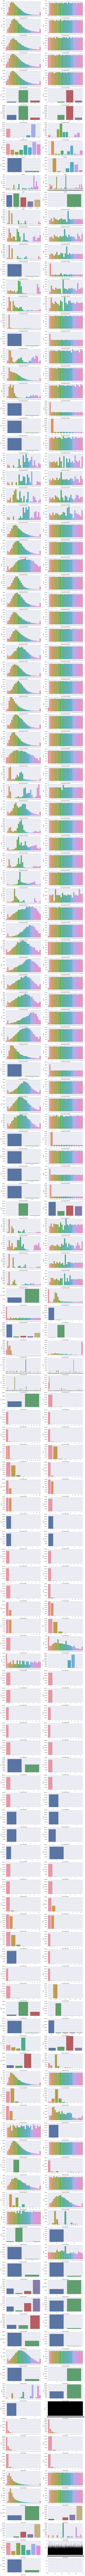

In [50]:
cols = 2
rows = np.ceil(len(plot_columns) / cols)

plt.figure()
f, ax = plt.subplots(148, 2, figsize=(15,500))
ax = ax.flatten()

for i, col in enumerate(plot_columns):
    sns.countplot(x=col, data=trainset.sort_values(by=col), ax=ax[i])